In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

sns.set()

In [2]:
listing_df = pd.read_csv('listings.csv')

In [3]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [5]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


# Data cleaning, munging and feature engineering

The next step is to clean this data and structure it for easier analysis by removing empty rows/columns or creating new features from columns. This is usually the longest step as it requires parsing each column and making sure it is as expected (especially if it is the first time you are working with the dataset)

In [6]:
def get_num_null(df):
    """
    This function computes the count of the missing values in each column of a dataframe
    
    Parameters: 
            DataFrame like object
            
    Returns:
            a python dictionary like object
    """
    null_counts = {}
    for col in df.columns:
        # looping through the list of columns and obtaining the missing value counts and its 
        #proportion and add it to a dictionary
        null_counts[col] = {'count':sum(df[col].isnull()),
                           'proportion': sum(df[col].isnull())/df.shape[0]
                           }
    return null_counts

In [7]:
listing_null_counts = get_num_null(listing_df)  # obtaing a dictionary of columns with missing values

In [8]:
def drop_high_null_counts(df, cut_off = 0.1):
    """
    This function removes the columns with very high count of the missing values of a dataframe
    
    Parameters: 
            df: DataFrame like object
            cut_off: accepted proportion of missing values
            
    Returns:
            df: DataFrame like object
    """
    
    # looping through the coulmns with null values and dropping columns with proportion greater than the specified cut off
    for col in listing_null_counts:
        if listing_null_counts[col]['proportion'] > cut_off:
            df = df.drop(col, axis=1)
    return df

In [9]:
listing_new = drop_high_null_counts(listing_df)  #dropping columns with high proportion of missing values

In [10]:
listing_new['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [11]:
listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 61 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
picture_url                         3585 non-null object
host_id                             3585 non-null int64
host_url                            3585 non-null object
host_name                           3585 non-null object
host_since                          3585 non-null object
host_location                       3574 non-null object
host_is_superhost                   3585 non-null object
host_thumbnail_url                  3585 

The Price Columns seems to come with the dollar sign. This will prevent us fro being able to perform numerical calculations with the column, unless we clean the column. the standard library 're' has a fucnction called sub which we will use

In [12]:
def extract_numbers(x):
    """
    This function extracts the numeric values from a string and converts to float
    
    Parameters: 
            x: string like object
            
    Returns:
            df: float like object
    """
    import re
    if type(x) == str:
        row = float(re.sub('\D', '', x))
    else:
        row = x 
    return row
listing_new['price'] = listing_new['price'].apply(lambda row: extract_numbers(row))

The data contains both categorical and numerical features. in order to perform numerical analysis on the numerical features and perform qualitative analysis on the categorical features, we will seperate them into their own subsets

In [13]:
def get_numeric_data(df):
    """
    This function gets the numerical variables of a pandas dataframe like objects
    
    Parameters: 
            df: a dataframe like object
            
    Returns:
            data: dataframe like object
    """
    data = df.select_dtypes(include=np.number)  # selecting columns where data type is an numpy numeric type
    return data

def get_category_data(df):
    """
    This function gets the categorical variables of a pandas dataframe like objects
    
    Parameters: 
            df: a dataframe like object
            
    Returns:
            dataframe like object
    """
    data = df.select_dtypes(include=['object']) # selecting columns where data type is an object

    return data

In [14]:
num_vars = get_numeric_data(listing_new)
cat_vars = get_category_data(listing_new)
price = num_vars['price']
num_var_features = num_vars.drop('price', axis=1)

The categorical features in this data has features with levels greater than 5. to avoid havin too much features after creating dummy variables of the features, we shall drop the categorical features with levels greater than 5

In [15]:
def get_cat_normal_level(df, levels = (1, 5)):
    """
    This function drops categorical columns with levels between the initialized levels
    
    Parameters: 
            df: a dataframe like object
            levels: a tuple like object of lenght two which signifies the levels. it is initialized between 1 and 5
            
    Returns:
            figure: a matplot figure like object
    """
    for column in df.columns:
        num_counts = len(df[column].value_counts())  #obtaining the number of levels
        if num_counts > levels[0] and num_counts <= levels[1]:
            # if the number of levels is not within the range, drop such feature
            data = df.drop(column, axis=1)
        
    return data
#dropping all categorical features with levels less than 2 or greater than 5
categorical_features = get_cat_normal_level(cat_vars)

After dropping features with very high proportion of missing values, it is expedient that we handle other features that still has missing values in them. 
the next section fills the numeric features with the mean of the features and the categorical features does so with the mode

In [16]:
def fill_na(data, type_='numeric'):
    """
    This function fills the missing values of the columns of a dataframe like object
    
    Parameters: 
            data: a dataframe like object with all columns either numerical or categorical
            type_: a string like object that specifies whether to fill a 
                    numerical dataframe or categorial dataframe
            
    Returns:
            figure: a matplot figure like object
    """
    if type_ == 'numeric':
        for col in data.columns:
            data[col] = data[col].fillna(data[col].mean())  
    else:
        for col in data.columns:
            data[col] = data[col].fillna(data[col].mode()[0])
    return data
categorical_features = fill_na(categorical_features, type_='category')
num_var_features=fill_na(num_var_features)

In [17]:
# dropping othet features that are not needed for the analysis
categorical_features = categorical_features.drop(['last_scraped', 'experiences_offered', 'state', 'country', 'country_code', 'calendar_last_scraped'], axis=1)

In [18]:
categorical_dummies = pd.get_dummies(data=categorical_features) # getting dummies of the categorical features

# What is the distribution of price

To have an idea of how the housing price is distributed, a histogram plot will be used to visualize the distribution

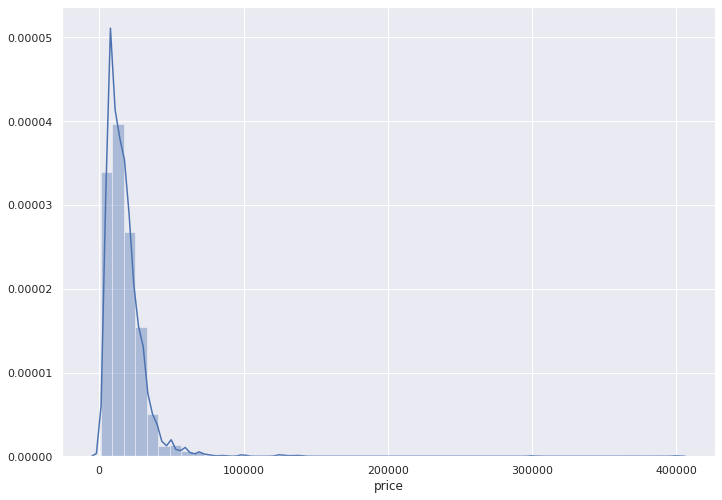

In [19]:
def plot_hist(data, col, dims = (11.7, 8.27)):
    """
    This function plots a histogram of a numerical variable
    
    Parameters: 
            data: a dataframe like object
            col: a string like object which can be found in data
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            figure: a matplot figure like object
    """
    fig, ax = plt.subplots(figsize=dims)  
    figure = sns.distplot(data[col])
    
    return figure
plot_hist(listing_new, col = 'price');

The histogram plot shows that most of the house prices were below 100k dollars and only a very few number of houses costs more than 100k

# Which house features has over 5% correlation with the price. Also, which house feature has the highest linear relationship with the price?

we try to explore the features of a house that have a linear correlation with the price of the house. The Pearson correlation coefficient was used to examine the relationship and the line graph below shows the distribution of the correlation coefficients against the features

In [20]:
def plot_heatmap(data, dims = (11.7, 8.27)):
    """
    This function plots a histogram of a numerical variable
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            figure: a matplot figure like object
    """
    fig, ax = plt.subplots(figsize=dims)
    figure = sns.heatmap(data.corr())
    
    return figure

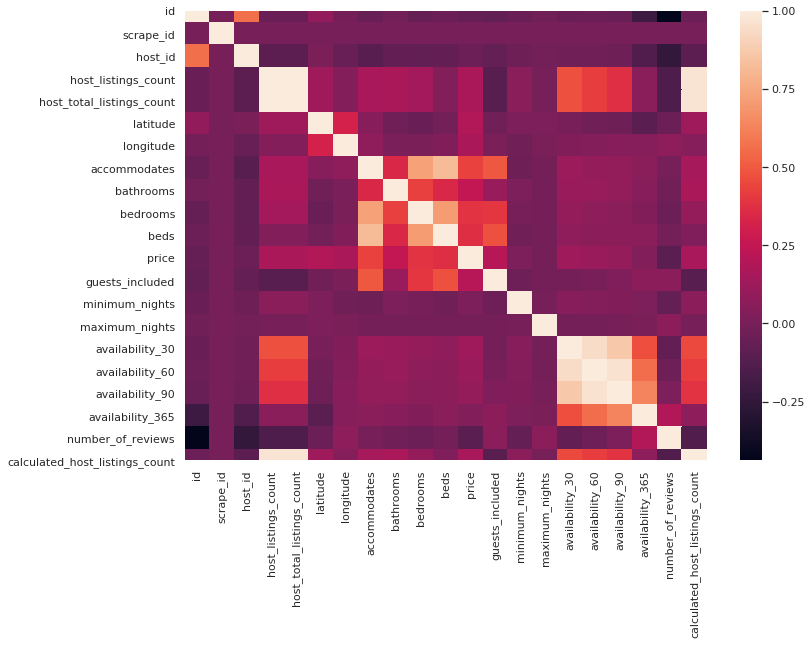

In [21]:
plot_heatmap(listing_new);

In [22]:
def get_corr_vars(num_features, y, cut_off=0.05):
    """
    This function computes the correlation values of y and all the columns of num_features
    
    Parameters: 
            num_features: DataFrame like object
            y: a series like object of numerical type
            cut_off: a float value between 0 and 1 that is used to cut of uncorrelated variables
            
    Returns:
            correlation_all: a dict like object of all the calculated correlation
            correlated: a dict like object of all the highly correlated items based on the cut_off
    """
    correlation_all = {}
    correlated = {}
    for feature in num_features:
        # getting the correlation coefficient of y and other numeric features where y is price in this analysis
        
        corr_value = y.corr(num_features[feature])  
        correlation_all[feature] = corr_value # appending the correlation correlation coefficient to a key (feature)
        if abs(corr_value) >= cut_off: 
            # dropping features whose coefficient is less than the specifief cut off
            correlated[feature] = corr_value
    return correlation_all, correlated

In [23]:
correlate = get_corr_vars(num_var_features, price)

In [24]:
corr_data = pd.DataFrame.from_dict(correlate[1], orient='index', columns=['corr_coef'])
corr_data.reset_index(inplace=True)

In [25]:
def plot_corr(data, dims = (10,7)):
    """
    This function plots a line graph of the correlated variables
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            chart: a matplot figure like object
    """
    plt.figure(figsize=dims)
    chart = sns.lineplot(x='index', y='corr_coef', data = data)
    # chart.set_xticklabels(labels=list(corr_data['index']),rotation = 45)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.xlabel('Features')
    plt.ylabel('Correlation coefficient')
    plt.title('Correlation of House Price and the numerical features');
    
    return chart

In [26]:
list_ = list(correlate[1].keys())

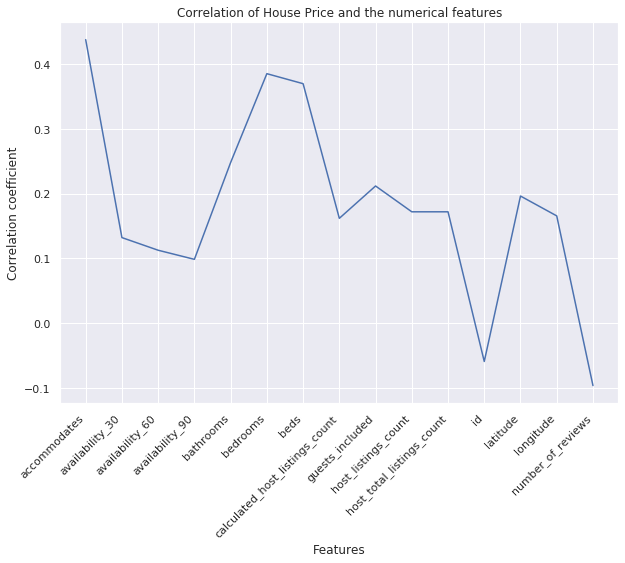

In [27]:
plot_corr(corr_data);

# How does the price of a house differ based on some categorical features

There are several categorical features in the dataset, but for the sake of simplicity, we only examine the distribution of house price among room types based on their market

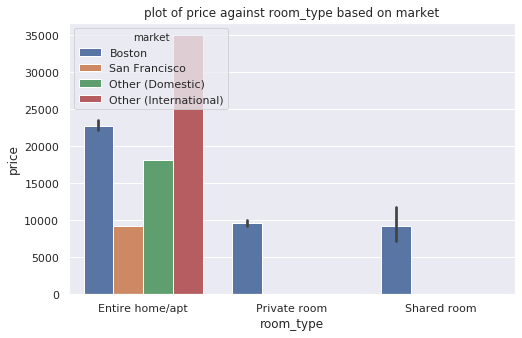

In [28]:
def plot_bar(data, x='room_type', y = price, hue=None, fig_size=(8,5)):  
    """
    This function plots a bar graph of the numerical variable against categorical variables
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            chart: a matplot figure like object
    """
    plt.figure(figsize=fig_size)
    chart = sns.barplot(x=x, y=price, data = data, hue=hue)
    plt.title('plot of {price} against {x} based on {hue}'.format(price=y.name, x = x, hue=hue))
    
    return chart
plot_bar(categorical_features, hue='market');

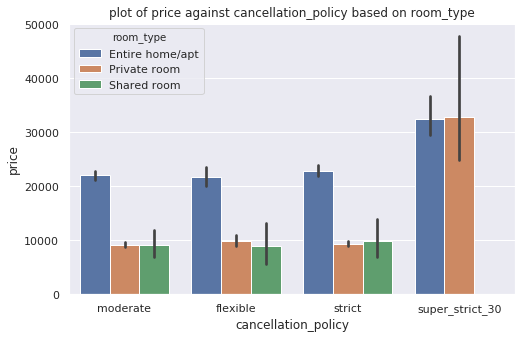

In [29]:
plot_bar(categorical_features, x='cancellation_policy', hue='room_type');

# What will the price of a new house be based on the the features

Once the data scientist have a better understanding of the actual data, they can use any predictive modeling method, along with their business understanding, to predict different business insights. We will use Linear Regression method in this article

In [30]:
# concatenating both the numerical and the categorical features into one
all_features = [num_var_features[list_], categorical_dummies]
features = pd.concat(all_features, axis=1)

In [31]:
features.dropna(axis=0, inplace=True)

In [32]:
features.drop('id', axis=1, inplace=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = features
y = price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42) # splitting data into train and test set

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

In [299]:
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Score:", np.round(model.score(X_test, y_test), 2))

MAE 24716234944077.176
MSE 3.850664054519593e+29
RMSE 620537191030448.5
Score: -1.3453146213260305e+21
